Task-1:-  Visual saliency detection, Unsupervised image segmentation, graph cut.


VISUAL SALIENCY DETECTION


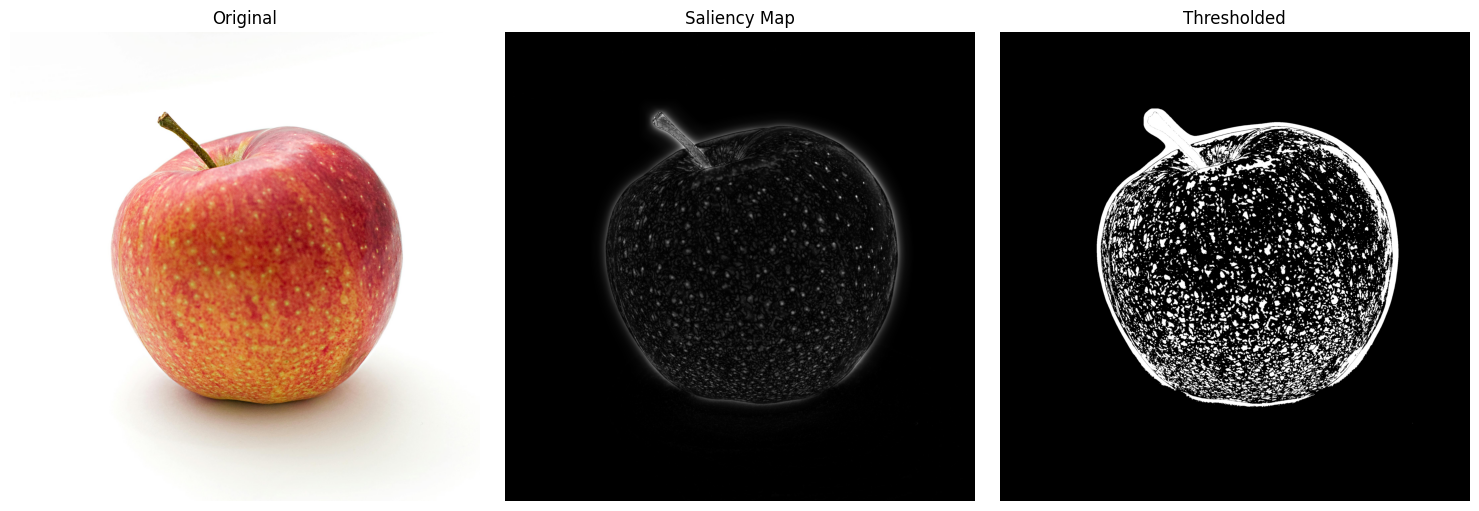


K-MEANS SEGMENTATION (k=4)


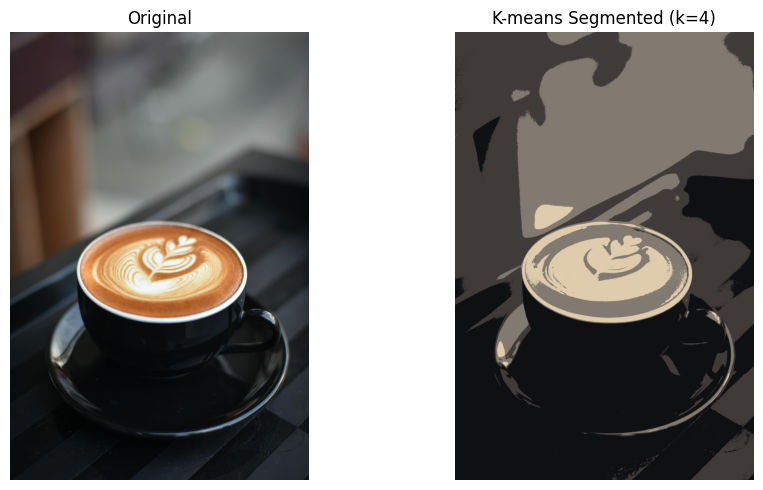


GRABCUT SEGMENTATION


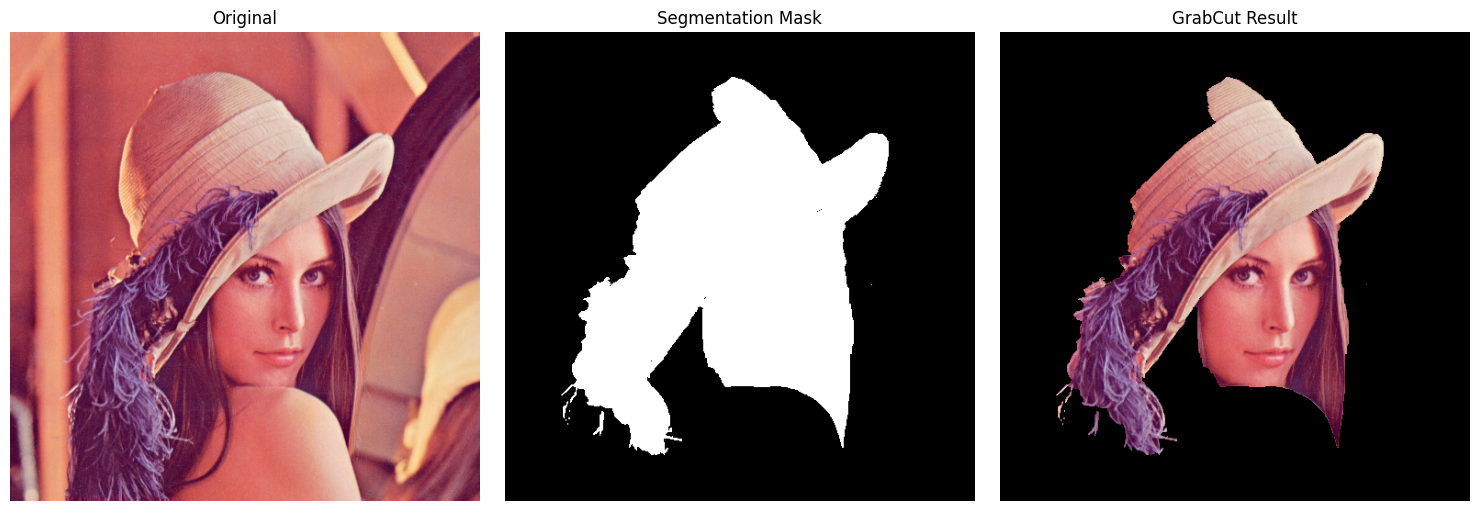


All tasks completed successfully!


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

class ImageProcessor:
    """A class to handle all image processing tasks"""

    def __init__(self):

        self.image_paths = {
            'saliency': '/content/pexels-mali-102104.jpg',
            'kmeans': '/content/pexels-chevanon-312418.jpg',
            'grabcut': '/content/lena.jpg'
        }
        self.validate_image_paths()

    def validate_image_paths(self):
        """Check if all image paths exist"""
        for task, path in self.image_paths.items():
            if not os.path.exists(path):
                raise FileNotFoundError(f"Image for {task} not found at {path}")

    def run_all_tasks(self):
        """Run all three processing tasks sequentially"""
        self.run_saliency_detection()
        self.run_kmeans_segmentation()
        self.run_grabcut_segmentation()
        print("\nAll tasks completed successfully!")

    def run_saliency_detection(self):
        """Run and visualize saliency detection"""
        print("\n" + "="*50)
        print("VISUAL SALIENCY DETECTION")
        print("="*50)

        image = self._load_image(self.image_paths['saliency'])
        if image is None:
            return


        saliency = cv2.saliency.StaticSaliencyFineGrained_create()
        success, saliency_map = saliency.computeSaliency(image)

        if not success:
            print("Failed to compute saliency map")
            return

        saliency_map = (saliency_map * 255).astype("uint8")
        _, thresh_map = cv2.threshold(saliency_map, 0, 255,
                                    cv2.THRESH_BINARY | cv2.THRESH_OTSU)


        self._plot_comparison(
            image,
            [saliency_map, thresh_map],
            ["Saliency Map", "Thresholded"],
            cmap='gray'
        )

    def run_kmeans_segmentation(self, k=4):
        """Run and visualize K-means segmentation"""
        print("\n" + "="*50)
        print(f"K-MEANS SEGMENTATION (k={k})")
        print("="*50)

        image = self._load_image(self.image_paths['kmeans'])
        if image is None:
            return


        processed = self._kmeans_process(image, k)


        self._plot_comparison(
            image,
            [processed],
            [f"K-means Segmented (k={k})"]
        )

    def run_grabcut_segmentation(self):
        """Run and visualize GrabCut segmentation"""
        print("\n" + "="*50)
        print("GRABCUT SEGMENTATION")
        print("="*50)

        image = self._load_image(self.image_paths['grabcut'])
        if image is None:
            return


        mask, result = self._grabcut_process(image)


        self._plot_comparison(
            image,
            [mask, result],
            ["Segmentation Mask", "GrabCut Result"],
            cmap='gray'
        )

    def _load_image(self, path):
        """Helper to load and convert image"""
        image = cv2.imread(path)
        if image is None:
            print(f"Error: Could not read image at {path}")
            return None
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    def _kmeans_process(self, image, k):
        """Perform K-means clustering"""
        pixel_values = image.reshape((-1, 3))
        pixel_values = np.float32(pixel_values)

        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
        _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

        centers = np.uint8(centers)
        return centers[labels.flatten()].reshape(image.shape)

    def _grabcut_process(self, image):
        """Perform GrabCut segmentation"""
        img_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        mask = np.zeros(img_bgr.shape[:2], np.uint8)


        h, w = img_bgr.shape[:2]
        rect = (50, 50, w-100, h-100)


        bgd_model = np.zeros((1, 65), np.float64)
        fgd_model = np.zeros((1, 65), np.float64)


        cv2.grabCut(img_bgr, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)


        final_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
        result = image * final_mask[:, :, np.newaxis]

        return final_mask, result

    def _plot_comparison(self, original, processed_list, titles_list, cmap=None):
        """Helper to plot original vs processed images"""
        num_images = 1 + len(processed_list)
        plt.figure(figsize=(5*num_images, 5))


        plt.subplot(1, num_images, 1)
        plt.imshow(original)
        plt.title("Original")
        plt.axis('off')


        for i, (processed, title) in enumerate(zip(processed_list, titles_list), 2):
            plt.subplot(1, num_images, i)
            if cmap:
                plt.imshow(processed, cmap=cmap)
            else:
                plt.imshow(processed)
            plt.title(title)
            plt.axis('off')

        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    processor = ImageProcessor()
    processor.run_all_tasks()

Task-2:-  Synthetic Human Action Video Generation using GANs on UCF101 human
activity dataset.

Loading videos...


Loading Basketball: 100%|██████████| 5/5 [00:00<00:00,  5.68it/s]

Dataset shape: (10, 16, 64, 64, 3)


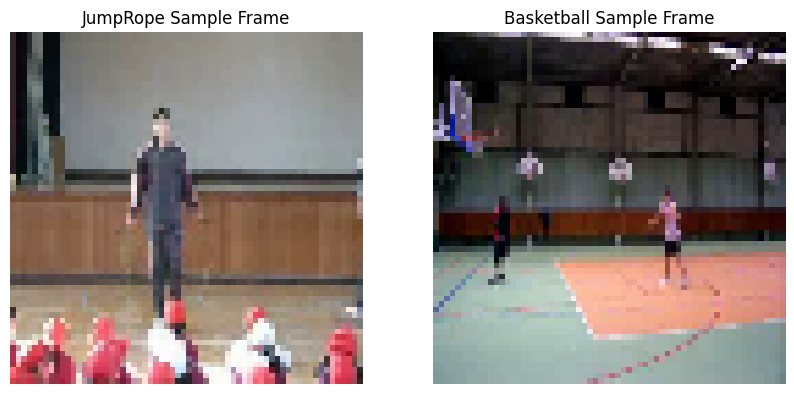

Generator output shape: (1, 16, 64, 64, 3)

Starting training...
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30s/step - d_loss: 5.2560 - g_loss: 0.0000e+00
Epoch 0 sample:


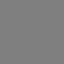

1/1 ━━━━━━━━━━━━━━━━━━━━ 31s 31s/step - d_loss: 5.2560 - g_loss: 0.0000e+00
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - d_loss: -8.0799 - g_loss: 0.0000e+00
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - d_loss: -20.0222 - g_loss: 0.0000e+00
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - d_loss: -19.2337 - g_loss: 0.0000e+00
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - d_loss: -24.7895 - g_loss: 14.9487
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - d_loss: -17.8688 - g_loss: 0.0000e+00
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - d_loss: -24.2409 - g_loss: 0.0000e+00
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - d_loss: -28.1920 - g_loss: 0.0000e+00
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - d_loss: -22.8688 - g_loss: 0.0000e+00
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - d_loss: -22.5055 - g_loss: 15.2365
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - d_loss: -22.2282 - g_loss: 0.0000e+00
Epoch 10 sample:


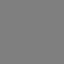

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - d_loss: -22.2282 - g_loss: 0.0000e+00
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - d_loss: -24.5218 - g_loss: 0.0000e+00
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - d_loss: -27.3308 - g_loss: 0.0000e+00
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - d_loss: -28.4229 - g_loss: 0.0000e+00
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - d_loss: -26.6518 - g_loss: 15.5375
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - d_loss: -18.6504 - g_loss: 0.0000e+00
Epoch 17/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - d_loss: -24.9324 - g_loss: 0.0000e+00
Epoch 18/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - d_loss: -25.8015 - g_loss: 0.0000e+00
Epoch 19/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - d_loss: -27.2150 - g_loss: 0.0000e+00
Epoch 20/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - d_loss: -28.5158 - g_loss: 15.0383
Epoch 21/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - d_loss: -17.5160 - g_loss: 0.0000e+00
Epoch 20 sample:


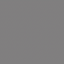

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - d_loss: -17.5160 - g_loss: 0.0000e+00
Epoch 22/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - d_loss: -20.0690 - g_loss: 0.0000e+00
Epoch 23/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - d_loss: -24.5675 - g_loss: 0.0000e+00
Epoch 24/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - d_loss: -21.2215 - g_loss: 0.0000e+00
Epoch 25/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - d_loss: -26.0931 - g_loss: 15.2401
Epoch 26/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - d_loss: -17.8276 - g_loss: 0.0000e+00
Epoch 27/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - d_loss: -20.8379 - g_loss: 0.0000e+00
Epoch 28/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - d_loss: -26.5661 - g_loss: 0.0000e+00
Epoch 29/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - d_loss: -27.9557 - g_loss: 0.0000e+00
Epoch 30/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - d_loss: -30.2067 - g_loss: 16.6775
Epoch 31/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - d_loss: -28.0077 - g_loss: 0.0000e+00
Epoch 30 sample:


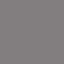

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - d_loss: -28.0077 - g_loss: 0.0000e+00
Epoch 32/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - d_loss: -21.9935 - g_loss: 0.0000e+00
Epoch 33/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - d_loss: -30.2292 - g_loss: 0.0000e+00
Epoch 34/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - d_loss: -30.6479 - g_loss: 0.0000e+00
Epoch 35/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - d_loss: -30.4062 - g_loss: 17.1145
Epoch 36/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - d_loss: -29.6967 - g_loss: 0.0000e+00
Epoch 37/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - d_loss: -31.1672 - g_loss: 0.0000e+00
Epoch 38/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - d_loss: -31.4385 - g_loss: 0.0000e+00
Epoch 39/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - d_loss: -22.6871 - g_loss: 0.0000e+00
Epoch 40/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - d_loss: -28.2695 - g_loss: 17.4644
Epoch 41/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - d_loss: -28.0109 - g_loss: 0.0000e+00
Epoch 40 sample:


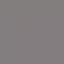

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - d_loss: -28.0109 - g_loss: 0.0000e+00
Epoch 42/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - d_loss: -26.2135 - g_loss: 0.0000e+00
Epoch 43/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - d_loss: -31.2448 - g_loss: 0.0000e+00
Epoch 44/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - d_loss: -34.1124 - g_loss: 0.0000e+00
Epoch 45/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - d_loss: -33.0957 - g_loss: 16.3226
Epoch 46/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - d_loss: -21.2696 - g_loss: 0.0000e+00
Epoch 47/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - d_loss: -31.0292 - g_loss: 0.0000e+00
Epoch 48/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - d_loss: -25.1468 - g_loss: 0.0000e+00
Epoch 49/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - d_loss: -30.3633 - g_loss: 0.0000e+00
Epoch 50/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - d_loss: -33.8619 - g_loss: 18.0882

Generating final videos...

Final Basketball video:


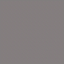

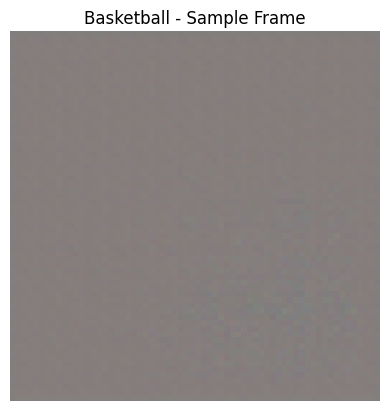


Final JumpRope video:


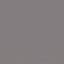

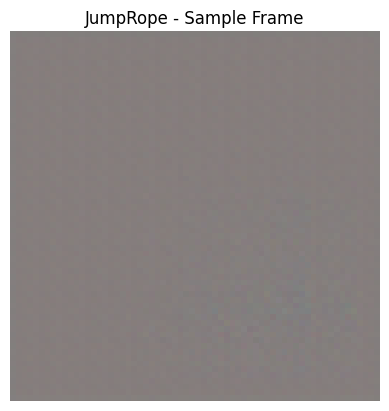

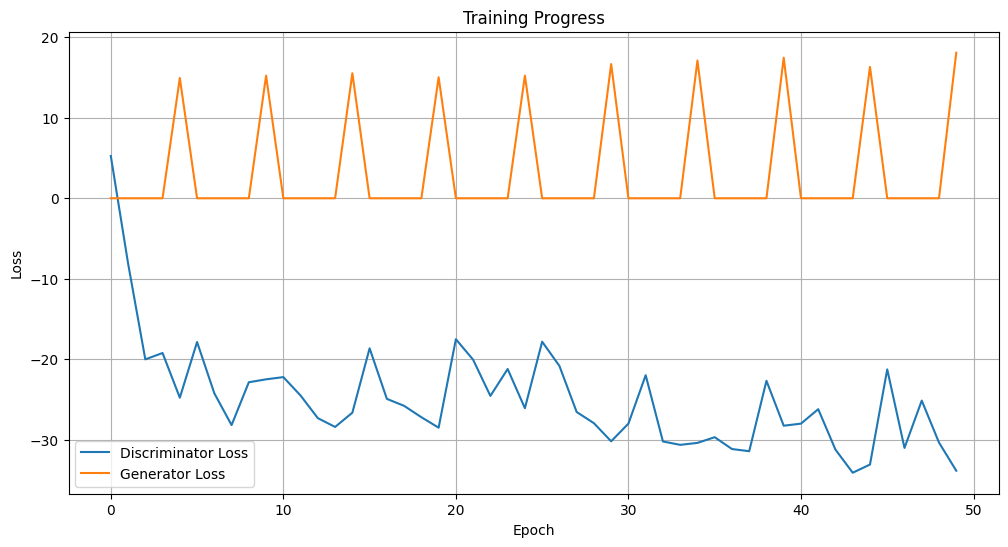


Training complete!


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import cv2
import imageio
from IPython.display import display, Image as IPImage
from glob import glob
from tqdm import tqdm
import random


random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


TARGET_FRAMES = 16
TARGET_SIZE = (64, 64)
LATENT_DIM = 256
BATCH_SIZE = 8
EPOCHS = 50


os.makedirs('generated_videos', exist_ok=True)


def load_video_frames(video_path, max_frames=TARGET_FRAMES):
    cap = cv2.VideoCapture(video_path)
    frames = []
    try:
        while len(frames) < max_frames:
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = cv2.resize(frame, TARGET_SIZE)
            frames.append(frame)
    except Exception as e:
        print(f"Error loading {video_path}: {str(e)}")
    finally:
        cap.release()

    if len(frames) == 0:
        return None


    if len(frames) < max_frames:
        indices = np.linspace(0, len(frames)-1, num=max_frames).astype(int)
        frames = [frames[i] for i in indices]

    return np.array(frames[:max_frames], dtype=np.float32) / 127.5 - 1.0

def load_class_videos(class_dir, max_videos=5):
    video_files = sorted(glob(os.path.join(class_dir, '*.avi')))[:max_videos]
    videos = []
    for video_file in tqdm(video_files, desc=f"Loading {os.path.basename(class_dir)}"):
        frames = load_video_frames(video_file)
        if frames is not None:
            videos.append(frames)
    return np.array(videos, dtype=np.float32)


print("Loading videos...")
jump_rope_path = '/content/drive/MyDrive/UCF101/UCF-101/JumpRope'
basketball_path = '/content/drive/MyDrive/UCF101/UCF-101/Basketball'

jump_rope_videos = load_class_videos(jump_rope_path)
basketball_videos = load_class_videos(basketball_path)

all_videos = np.concatenate([jump_rope_videos, basketball_videos])
print(f"Dataset shape: {all_videos.shape}")


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow((jump_rope_videos[0][8] + 1) * 127.5 / 255.0)
plt.title("JumpRope Sample Frame")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow((basketball_videos[0][8] + 1) * 127.5 / 255.0)
plt.title("Basketball Sample Frame")
plt.axis('off')
plt.show()


def build_generator():
    model = models.Sequential([

        layers.Dense(4*4*4*512, use_bias=False, input_shape=(LATENT_DIM,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),
        layers.Reshape((4, 4, 4, 512)),


        layers.Conv3DTranspose(256, (4,4,4), strides=(2,1,1), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),


        layers.Conv3DTranspose(128, (4,4,4), strides=(1,2,2), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),


        layers.Conv3DTranspose(64, (4,4,4), strides=(2,2,2), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),


        layers.Conv3DTranspose(32, (4,4,4), strides=(1,4,4), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),


        layers.Conv3D(3, (3,3,3), padding='same', activation='tanh')
    ])
    return model

def build_discriminator():
    model = models.Sequential([
        layers.Conv3D(64, (4,4,4), strides=(2,2,2), padding='same',
                     input_shape=(TARGET_FRAMES, *TARGET_SIZE, 3)),
        layers.LeakyReLU(0.2),
        layers.Dropout(0.3),

        layers.Conv3D(128, (4,4,4), strides=(2,2,2), padding='same'),
        layers.LayerNormalization(),
        layers.LeakyReLU(0.2),
        layers.Dropout(0.3),

        layers.Conv3D(256, (4,4,4), strides=(2,2,2), padding='same'),
        layers.LayerNormalization(),
        layers.LeakyReLU(0.2),
        layers.Dropout(0.3),

        layers.GlobalAveragePooling3D(),
        layers.Dense(1)
    ])
    return model


class VideoGAN(tf.keras.Model):
    def __init__(self, generator, discriminator):
        super(VideoGAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator
        self.gp_weight = 10.0

    def compile(self, g_optimizer, d_optimizer):
        super(VideoGAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.d_loss_metric = tf.keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = tf.keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def gradient_penalty(self, real_videos, fake_videos):
        batch_size = tf.shape(real_videos)[0]
        epsilon = tf.random.uniform([batch_size, 1, 1, 1, 1], 0.0, 1.0)
        interpolated = epsilon * real_videos + (1 - epsilon) * fake_videos

        with tf.GradientTape() as tape:
            tape.watch(interpolated)
            pred = self.discriminator(interpolated, training=True)

        gradients = tape.gradient(pred, interpolated)
        gradients_norm = tf.sqrt(tf.reduce_sum(tf.square(gradients), axis=[1, 2, 3, 4]))
        return tf.reduce_mean((gradients_norm - 1.0) ** 2)

    @tf.function
    def train_step(self, real_videos):
        real_videos = tf.cast(real_videos, tf.float32)
        batch_size = tf.shape(real_videos)[0]


        with tf.GradientTape() as d_tape:
            noise = tf.random.normal([batch_size, LATENT_DIM])
            fake_videos = self.generator(noise, training=True)

            real_output = self.discriminator(real_videos, training=True)
            fake_output = self.discriminator(fake_videos, training=True)

            d_loss = tf.reduce_mean(fake_output) - tf.reduce_mean(real_output)
            gp = self.gradient_penalty(real_videos, fake_videos)
            d_loss += gp * self.gp_weight

        d_gradients = d_tape.gradient(d_loss, self.discriminator.trainable_variables)
        self.d_optimizer.apply_gradients(zip(d_gradients, self.discriminator.trainable_variables))


        if self.d_optimizer.iterations % 5 == 0:
            with tf.GradientTape() as g_tape:
                fake_videos = self.generator(noise, training=True)
                fake_output = self.discriminator(fake_videos, training=True)
                g_loss = -tf.reduce_mean(fake_output)

            g_gradients = g_tape.gradient(g_loss, self.generator.trainable_variables)
            self.g_optimizer.apply_gradients(zip(g_gradients, self.generator.trainable_variables))
        else:
            g_loss = 0.0


        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)

        return {"d_loss": self.d_loss_metric.result(), "g_loss": self.g_loss_metric.result()}


generator = build_generator()
discriminator = build_discriminator()


test_noise = tf.random.normal([1, LATENT_DIM])
test_output = generator(test_noise)
print(f"Generator output shape: {test_output.shape}")


dataset = tf.data.Dataset.from_tensor_slices(all_videos)
dataset = dataset.shuffle(1024).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE).repeat()


gan = VideoGAN(generator, discriminator)
gan.compile(
    g_optimizer=tf.keras.optimizers.Adam(0.0001, beta_1=0.5, beta_2=0.9),
    d_optimizer=tf.keras.optimizers.Adam(0.0004, beta_1=0.5, beta_2=0.9)
)


class VideoMonitor(tf.keras.callbacks.Callback):
    def __init__(self, num_samples=1):
        self.num_samples = num_samples
        self.latent_vectors = tf.random.normal([num_samples, LATENT_DIM])

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 5 == 0:
            generated = self.model.generator(self.latent_vectors).numpy()
            video = (np.clip(generated[0], -1, 1) * 127.5 + 127.5).astype(np.uint8)

            output_path = f"generated_videos/epoch_{epoch}.gif"
            imageio.mimsave(output_path, video, fps=8)

            if epoch % 10 == 0:
                print(f"\nEpoch {epoch} sample:")
                display(IPImage(filename=output_path))


print("\nStarting training...")
history = gan.fit(
    dataset,
    epochs=EPOCHS,
    steps_per_epoch=len(all_videos) // BATCH_SIZE,
    callbacks=[VideoMonitor()]
)


print("\nGenerating final videos...")
class_latents = {
    "Basketball": tf.random.normal([1, LATENT_DIM]),
    "JumpRope": tf.random.normal([1, LATENT_DIM])
}

for class_name, latent in class_latents.items():
    generated = generator(latent).numpy()[0]
    video = (np.clip(generated, -1, 1) * 127.5 + 127.5).astype(np.uint8)

    output_path = f"generated_videos/final_{class_name.lower()}.gif"
    imageio.mimsave(output_path, video, fps=8)

    print(f"\nFinal {class_name} video:")
    display(IPImage(filename=output_path))


    sample_frame = video[len(video)//2]
    plt.imshow(sample_frame)
    plt.title(f"{class_name} - Sample Frame")
    plt.axis('off')
    plt.show()


plt.figure(figsize=(12, 6))
plt.plot(history.history['d_loss'], label='Discriminator Loss')
plt.plot(history.history['g_loss'], label='Generator Loss')
plt.title('Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

print("\nTraining complete!")

In [ ]:
# Install required packages
!pip install tensorflow tensorflow-gpu opencv-python matplotlib imageio tqdm

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install opencv-python numpy imageio matplotlib tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-python scikit-image scikit-learn matplotlib networkx

In [ ]:
!pip install gco-wrapper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.0/243.0 kB 6.4 MB/s eta 0:00:00


In [ ]:
!pip install scikit-image numpy matplotlib opencv-python networkx